# import necessary modules

In [151]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load data 

In [152]:
(X_train,Y_train),(X_test,Y_test) = load_data()

In [153]:
len(X_train)

60000

In [154]:
len(X_test)

10000

In [156]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size = 0.16666, random_state = 42)

In [157]:
len(X_train)


50000

# Normalize train_x, test_x and validation_x

In [159]:
#Normalization



In [160]:
X_train.shape

(50000, 28, 28)

In [11]:
#Convert (50000,28,28,1).   Reshaping the dataset in this way is done to match the expected input format 
#for convolutional neural networks (CNNs).
#Adding the Channel Dimension: The original shape of each image in MNIST is (28, 28), 
#which is a 2D representation. However, CNNs expect a 3D input format, 
#including the height, width, and the number of channels. Since MNIST images are grayscale (not color), 
#there is only one channel. So, you reshape the images to (28, 28, 1).

# Reshape train_x, test_x and validation_x to match input format of CNN

In [161]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_val   = X_val.reshape((X_val.shape[0],28,28,1))
X_test  = X_test.reshape((X_test.shape[0],28,28,1))


In [162]:
X_train.shape

(50000, 28, 28, 1)

In [163]:
# Convert y to categorcal
Y_train = to_categorical(Y_train,10)
Y_test  = to_categorical(Y_test,10)
Y_val   = to_categorical(Y_val,10)


In [164]:
# Sample Training Data
# fig, axes = plt.subplots(3,3, figsize=(8,8))
# fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

# for ax in axes.flatten():
#     ax.axis('off')
# for i, ax in enumerate(axes.flatten()):
#     if i<9:
#         ax.imshow(X_train[i],cmap = 'gray')
#         ax.set_title(f'Label:{np.argmax(Y_train[i])}')
#         ax.axis('off')

def display_some_images(img_set,title_set):
    for i in range (0,9):
        plt.subplot(3,3,i+1)
        plt.imshow(img_set[i],cmap = 'gray')
        plt.title(f'Label: {np.argmax(title_set[i])}')

    plt.tight_layout()
    plt.show()


        


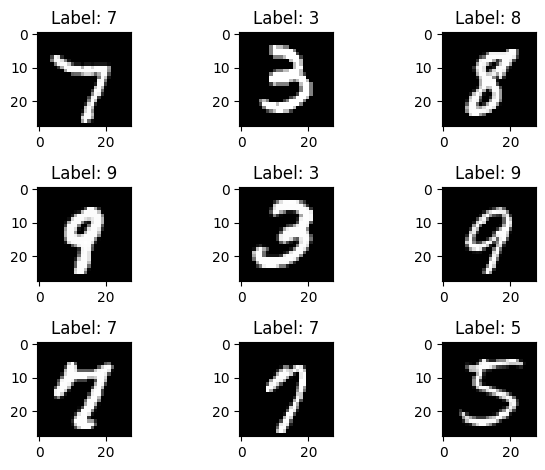

In [165]:
display_some_images(X_val[:9],Y_val[:9])

# Define Model

In [166]:
def create_model():
    inputs = Input(shape=(28,28,1))
    x = Conv2D(filters = 32, kernel_size =(3,3), padding = "same", strides = (1,1), activation = "relu", name ="Conv2D_1")(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(filters =64, kernel_size = (3,3), padding = "same", strides = (1,1), activation = "relu", name = "Conv2D_2")(x)
    x = MaxPooling2D()(x)
    x = Flatten(name = "Flatten_layer")(x)
    x = Dense(64, activation = "relu", name = "Dense1")(x)
    outputs = Dense(10, activation = "softmax", name = "output_layer")(x)
    model = Model(inputs, outputs)
    return model
    
    

In [167]:
model =create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 Conv2D_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 Flatten_layer (Flatten)     (None, 3136)              0   

# Compile and fit model

In [168]:
model.compile(loss = 'categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])

In [169]:
history_1 = model.fit(X_train, Y_train, validation_data =(X_val,Y_val),epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 37s 22ms/step - loss: 0.9238 - accuracy: 0.6999 - val_loss: 0.3902 - val_accuracy: 0.8806
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.3614 - accuracy: 0.8921 - val_loss: 0.3155 - val_accuracy: 0.9055
Epoch 3/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.3051 - accuracy: 0.9080 - val_loss: 0.2688 - val_accuracy: 0.9188
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.2626 - accuracy: 0.9212 - val_loss: 0.2287 - val_accuracy: 0.9294
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2241 - accuracy: 0.9323 - val_loss: 0.1952 - val_accuracy: 0.9414
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.1893 - accuracy: 0.9428 - val_loss: 0.1683 - val_accuracy: 0.9481
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.1578 - accuracy: 0.9518 - val_loss: 0.1456 -

# Dataset augmentation

In [170]:
def augmentation(X,Y):
    datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = .2,
        width_shift_range=0.15,
        height_shift_range=0.15
    )

    augmented_images = []
    augmented_labels = []

    batch_size = len(X)
    generator = datagen.flow(X,Y,batch_size = batch_size)
    images ,labels = next(generator)
    
    augmented_images.extend(images)
    augmented_labels.extend(labels)

    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    
    x_combined = np.concatenate((X,augmented_images))
    y_combined = np.concatenate((Y,augmented_labels))
    return (x_combined,y_combined)
    
    

# Augmented train_X, test_X, train_Y, test_Y

In [171]:
(x_train_augmented, y_train_augmented) = augmentation(X_train,Y_train)


In [176]:
(x_test_augmented, y_test_augmented) =augmentation(X_test,Y_test)


In [177]:
len(y_test_augmented)

20000

# Create augmented model

In [178]:
augmented_model = create_model()

In [179]:
augmented_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 Conv2D_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 Flatten_layer (Flatten)     (None, 3136)              0   

# Compile and fit Augmented Model

In [180]:
augmented_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])


In [181]:
history2 = augmented_model.fit(x_train_augmented, y_train_augmented, validation_data =(X_val,Y_val), epochs = 10)

Epoch 1/10
3125/3125 [==============================] - 77s 23ms/step - loss: 1.8075 - accuracy: 0.3444 - val_loss: 0.5473 - val_accuracy: 0.8662
Epoch 2/10
3125/3125 [==============================] - 67s 21ms/step - loss: 0.8877 - accuracy: 0.7132 - val_loss: 0.2990 - val_accuracy: 0.9181
Epoch 3/10
3125/3125 [==============================] - 76s 24ms/step - loss: 0.6672 - accuracy: 0.7879 - val_loss: 0.2244 - val_accuracy: 0.9392
Epoch 4/10
3125/3125 [==============================] - 66s 21ms/step - loss: 0.5267 - accuracy: 0.8346 - val_loss: 0.1800 - val_accuracy: 0.9496
Epoch 5/10
3125/3125 [==============================] - 65s 21ms/step - loss: 0.4479 - accuracy: 0.8600 - val_loss: 0.1538 - val_accuracy: 0.9530
Epoch 6/10
3125/3125 [==============================] - 74s 24ms/step - loss: 0.3982 - accuracy: 0.8763 - val_loss: 0.1431 - val_accuracy: 0.9608
Epoch 7/10
3125/3125 [==============================] - 69s 22ms/step - loss: 0.3613 - accuracy: 0.8884 - val_loss: 0.1334 -

# test accuracy without augmentation and augmentation test set in both model

print("test accuracy without augmented test data : " model.evaluate(X_test,Y_test)


In [182]:
test_acc1 = model.evaluate(X_test, Y_test)
test_acc2 = model.evaluate(x_test_augmented,y_test_augmented)

625/625 [==============================] - 6s 9ms/step - loss: 1.7387 - accuracy: 0.7013


In [145]:
len(X_test)

10000

In [183]:
test_acc2 = augmented_model.evaluate(X_test,Y_test)
test_acc3 = augmented_model.evaluate(x_test_augmented,y_test_augmented)


625/625 [==============================] - 7s 11ms/step - loss: 0.2871 - accuracy: 0.9081


# ploting training accuracy and validation accuracy  model_1( Original dataset)

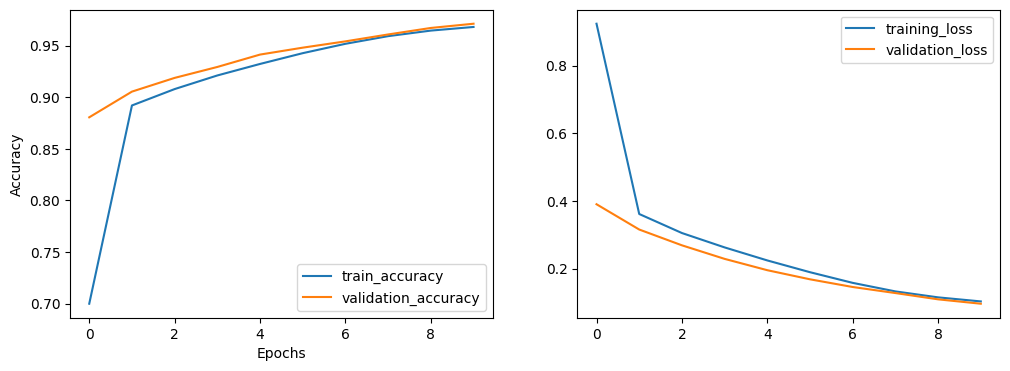

In [184]:
history = history_1.history
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','validation_accuracy'])

plt.subplot(1,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['training_loss','validation_loss'])
plt.show()

# ploting training loss and validation loss model 1 (original dataset)

In [ ]:
history = history2.history
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','validation_accuracy'])

plt.subplot(1,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['training_loss','validation_loss'])
plt.show()